#타이타닉 데이터 *EDA*
##생존에 영향을 미친 요인이 무엇인지 찾고, 높은 영향력을 가진 컬럼 순서대로 순위화 진행.



**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신
<br><br>
###추측 - 어떤 요인이 타이타닉 생존률에 영향을 미쳤을까?
* pclass - 더 높은 객실 등급에 머물렀던 손님이 생존 과정에서 우선적으로 구출되었을것 같다. (당시 시대를 고려했을 때)
(home, fare - pclass와 직 간접적으로 영향이 있을것으로 예상된다.)

* sex - 사고 재난 상황에서 신체적으로 생존에 유리한 남성이 여성에 비해 생존률이 높았을것 같다.

* age - 신체능력이 가장 뛰어난 20,30대가 높은 생존률을 가질 것으로 예상한다.

* sibsp, parch 형제, 부부, 부모, 자녀가 있는 사람들은 서로 도울 수 있기 때문에 혼자인 사람들에 비해 생존률이 높을것으로 예상된다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.데이터 확인

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

###전체 데이터 수 1309개
###age, fare, cabin, embarked, boat, body, home.dest, 7개 컬럼에 결측치가 확인됩니다.

# 2.전처리
##이상값 제거 및 대체

##결측값이 있는 컬럼은 어떻게 처리할 것인가??

### boat, body, home.dest, cabin 4개의 컬럼은 너무 많은 결측치가 확인되었습니다. 이 4개 컬럼들은 데이터 정확도를 떨어뜨릴 위험과 유의미한 결과를 얻는데 방해가 될 것으로 예상되어 제거하였습니다.
###age컬럼은 1309중 263개의 결측값이 확인되었습니다. 평균 나이값으로 결측값을 대체하였습니다.
###fare, emberked 컬럼은 결측값이 1309개 중 1, 2개로 데이터 결과에 영향을 미치치 않을 것으로 예상되어 데이터 수정을 하지 않았습니다.

In [8]:
df2 = df.drop(['boat','body','home.dest'], axis=1)
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [9]:
df2['name'].value_counts()
#Length: 1307 종류의 이름

Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: name, Length: 1307, dtype: int64

In [10]:
df2['ticket'].value_counts()
#Length: 929 종류의 티켓

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: ticket, Length: 929, dtype: int64

###name, ticket 컬럼은 의미하는 바가 없는것으로 판단하여 데이터분석에서 제외하겠습니다.

###cabin 컬럼은 drop으로 제거되지 않아서, 사용하고자 하는 컬럼들을 직접 지정해 새로운 DataFrame을 만들었습니다.


In [11]:
df3 = df[['pclass','survived','sex','age','sibsp','parch','fare','embarked']]
df3

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.50,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.50,0,0,7.2250,C
1307,3,0,male,27.00,0,0,7.2250,C


###다음으로 일부 값이 비어있는 'age'컬럼은 전체 승객의 평균 나이값으로 대체했습니다.

In [12]:
df3['age'] = df3['age'].fillna(df3['age'].mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###전처리 후 현재 columns 정보
- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- fare : 지불한 운임
- embarked : 선착장정보

# 3.상관관계 및 데이터 시각화 분석

###pclass 컬럼

####객실 등급이 높아짐에 따라 생존률이 상승하는 추세입니다.  

In [13]:
#'pclass'객실 등급에 따른 생존률
pd.pivot_table(data=df3, index=['pclass'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
pclass,,,
1,200,0.619195,323
2,119,0.429603,277
3,181,0.255289,709


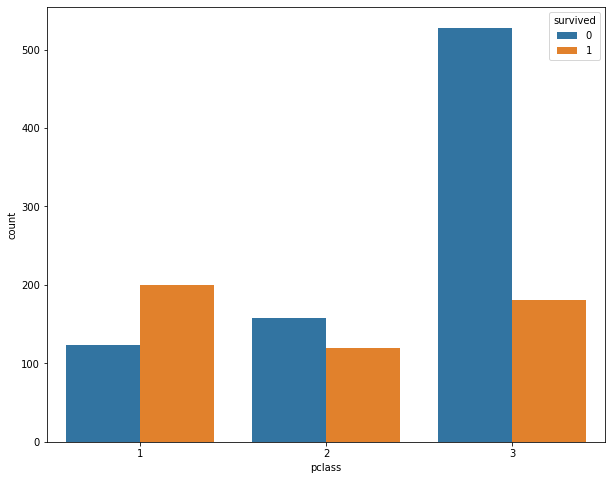

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=df3, x='pclass', hue='survived')
plt.show()

####여성이 객실등급이 1,2 일때 높은 생존률을 보여주지만, 남성의 경우 객실등급이 1등급인 경우를 제외하고 낮은 생존률을 보입니다.

In [15]:
#'pclass'객실 등급에 따른 생존률2
pd.pivot_table(data=df3, index=['pclass','sex'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
              survived  survived survived
pclass sex                               
1      female      139  0.965278      144
       male         61  0.340782      179
2      female       94  0.886792      106
       male         25  0.146199      171
3      female      106  0.490741      216
       male         75  0.152130      493

###sex 컬럼

####성별이 여성일 경우에 생존률이 크게 상승했습니다.  <br><br>
####전체 평균 생존률 38.2%<br>
####여성 : 약 72.7% 생존 <br>
####남성 : 약 19% 생존

In [17]:
#'sex'성별에 따른 생존률
pd.pivot_table(data=df3, index=['sex'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
sex,,,
female,339,0.727468,466
male,161,0.190985,843


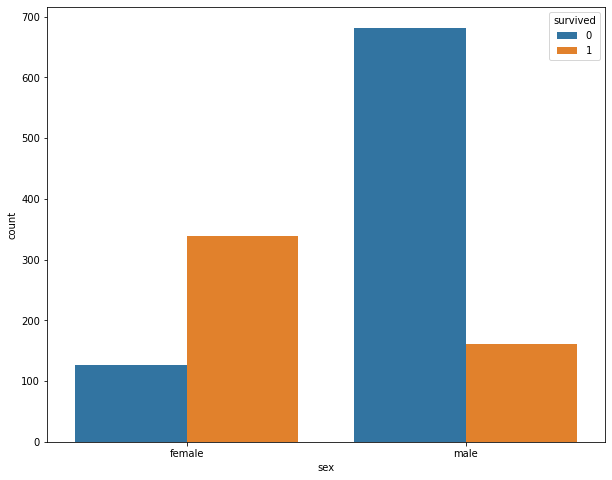

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data=df3, x='sex', hue='survived')

In [19]:
#'sex'성별에 따른 생존률2
pd.pivot_table(data=df3, index=['sex','pclass'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
              survived  survived survived
sex    pclass                            
female 1           139  0.965278      144
       2            94  0.886792      106
       3           106  0.490741      216
male   1            61  0.340782      179
       2            25  0.146199      171
       3            75  0.152130      493

###parch 컬럼
1~3명의 부모, 혹은 자녀가 있는 경우 생존률이 가장 높지만
데이터 분포가 고르지 않고 한쪽으로 쏠려있어 유의미한 데이터가 아닌것 같다.
 

In [20]:
#'parch'부모, 혹은 자녀의 수에 따른 생존률
pd.pivot_table(data=df3, index=['parch'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
parch,,,
0,336,0.335329,1002
1,100,0.588235,170
2,57,0.504425,113
3,5,0.625000,8
4,1,0.166667,6
5,1,0.166667,6
6,0,0.000000,2
9,0,0.000000,2


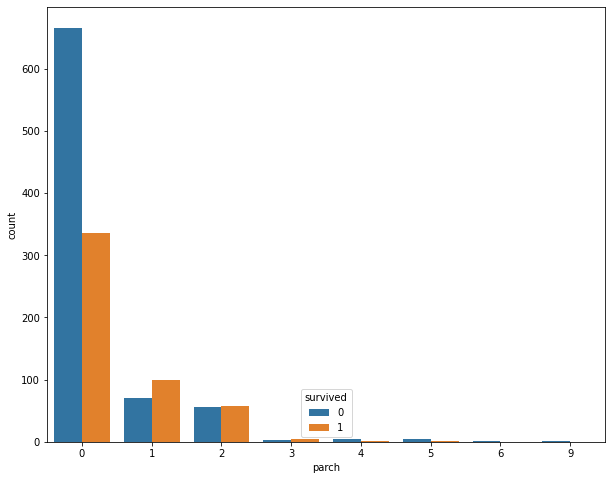

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data=df3, x='parch', hue='survived')
plt.show()

####높은 상관 관계를 띄는 객실과 성별(여성)이 자녀가 있는 경우 생존률이 어떻게 달라질까? 
<br>

####추측 : 위에서 진행한 pclass, sex는 유의미한 상관관계가 있었다. 만약 부모 및 자녀가 생존률에 영향을 미친다면 pclass, sex 와 같이 통계를 진행했을 때 더 높은 생존률을 나타낼 것이다. 

<br>

####결과 : 전반적으로 부모 및 자녀 수가 1~2명일 때 가장 높은 생존률을 띄지만 부모 및 자녀 수가 0명일 때와 크게 다르지 않다는 점을 미뤄보아 부모 및 자녀 수는 생존률에 영향을 미치지 않는 것으로 판단된다.

In [22]:
#'parch'부모, 혹은 자녀의 수에 따른 생존률2
pd.pivot_table(data=df3, index=['pclass','parch','sex'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
                    survived  survived survived
pclass parch sex                               
1      0     female       94  0.969072       97
             male         47  0.324138      145
       1     female       29  1.000000       29
             male          7  0.333333       21
       2     female       14  0.875000       16
             male          7  0.636364       11
       3     female        1  1.000000        1
             male          0  0.000000        1
       4     female        1  1.000000        1
             male          0  0.000000        1
2      0     female       51  0.836066       61
             male         13  0.089655      145
       1     female       22  0.916667       24
             male          9  0.473684       19
       2     female       18  1.000000       18
             male          3  0.428571        7
       3     female        3  1.000000        3
3      0     female       73  0.540741      135
             male         58  0.138425      419
       1     female       19  0.542857       35
             male         14  0.333333       42
       2     female       12  0.342857       35
             male          3  0.115385       26
       3     female        1  0.500000        2
             male          0  0.000000        1
       4     female        0  0.000000        3
             male          0  0.000000        1
       5     female        1  0.250000        4
             male          0  0.000000        2
       6     female        0  0.000000        1
             male          0  0.000000        1
       9     female        0  0.000000        1
             male          0  0.000000        1

###sibsp컬럼
parch 컬럼과 동일하게 일부 조건에 데이터가 모여있어 생존률을 파악하는 데이터로 활용이 어려울것 같습니다.

In [23]:
#'sibsp'형제 혹은 부부의 수에 따른 생존률
pd.pivot_table(data=df3, index=['sibsp'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
sibsp,,,
0,309,0.346801,891
1,163,0.510972,319
2,19,0.452381,42
3,6,0.300000,20
4,3,0.136364,22
5,0,0.000000,6
8,0,0.000000,9


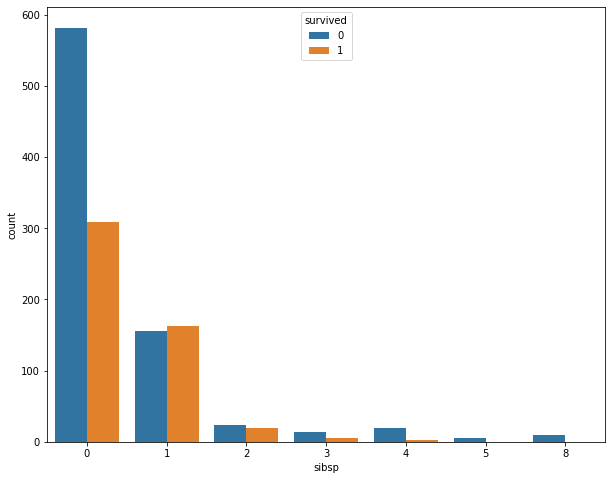

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data=df3, x='sibsp', hue='survived')
plt.show()

###embarked컬럼



####선착장 위치에 따라 생존률 변화가 관찰됩니다.
####C > Q > S 
####C선착장이 구명보트에 접근하기 쉬운 위치 or 탈출에 유리한 장소였을 것이라고 예상됩니다.

In [25]:
#'embarked'선착장정보에 따른 생존률
pd.pivot_table(data=df3, index=['embarked'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
embarked,,,
C,150,0.555556,270
Q,44,0.357724,123
S,304,0.332604,914


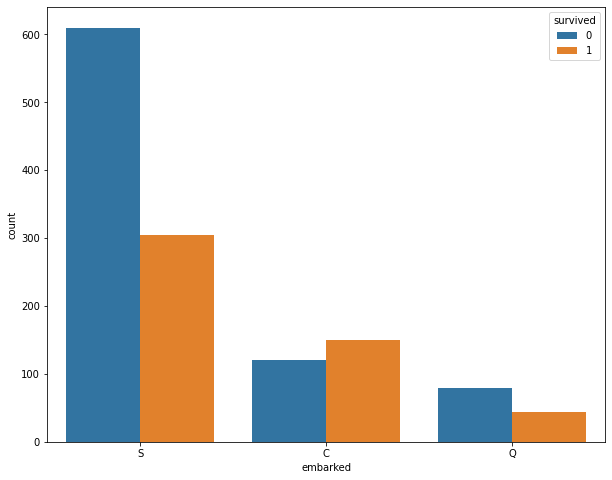

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=df3, x='embarked', hue='survived')
plt.show()

In [42]:
#'embarked'선착장정보에 따른 생존률2
pd.pivot_table(data=df3, index=['sex','pclass','embarked'], values='survived', aggfunc=['sum','mean','count'])

sum      mean    count
                       survived  survived survived
sex    pclass embarked                            
female 1      C              69  0.971831       71
              Q               2  1.000000        2
              S              66  0.956522       69
       2      C              11  1.000000       11
              Q               2  1.000000        2
              S              81  0.870968       93
       3      C              22  0.709677       31
              Q              33  0.589286       56
              S              51  0.395349      129
male   1      C              28  0.400000       70
              Q               0  0.000000        1
              S              33  0.305556      108
       2      C               5  0.294118       17
              Q               0  0.000000        5
              S              20  0.134228      149
       3      C              15  0.214286       70
              Q               7  0.122807       57
              S              53  0.144809      366

In [29]:
pd.pivot_table(data=df3, index=['fare'], values='survived', aggfunc=['sum','mean','count'])

,sum,mean,count
,survived,survived,survived
fare,,,
0.0000,2,0.117647,17
3.1708,1,1.000000,1
4.0125,0,0.000000,1
5.0000,0,0.000000,1
6.2375,0,0.000000,1
...,...,...,...
227.5250,3,0.600000,5
247.5208,2,0.666667,3


###fare컬럼
####추측 : 금액fare이 높으면 높아질 수록 생존률에 더 유리할 것이다. 금액은 'pclass' 객실 등급 컬럼과 직접적으로 연관이 있을 것으로 예상된다.

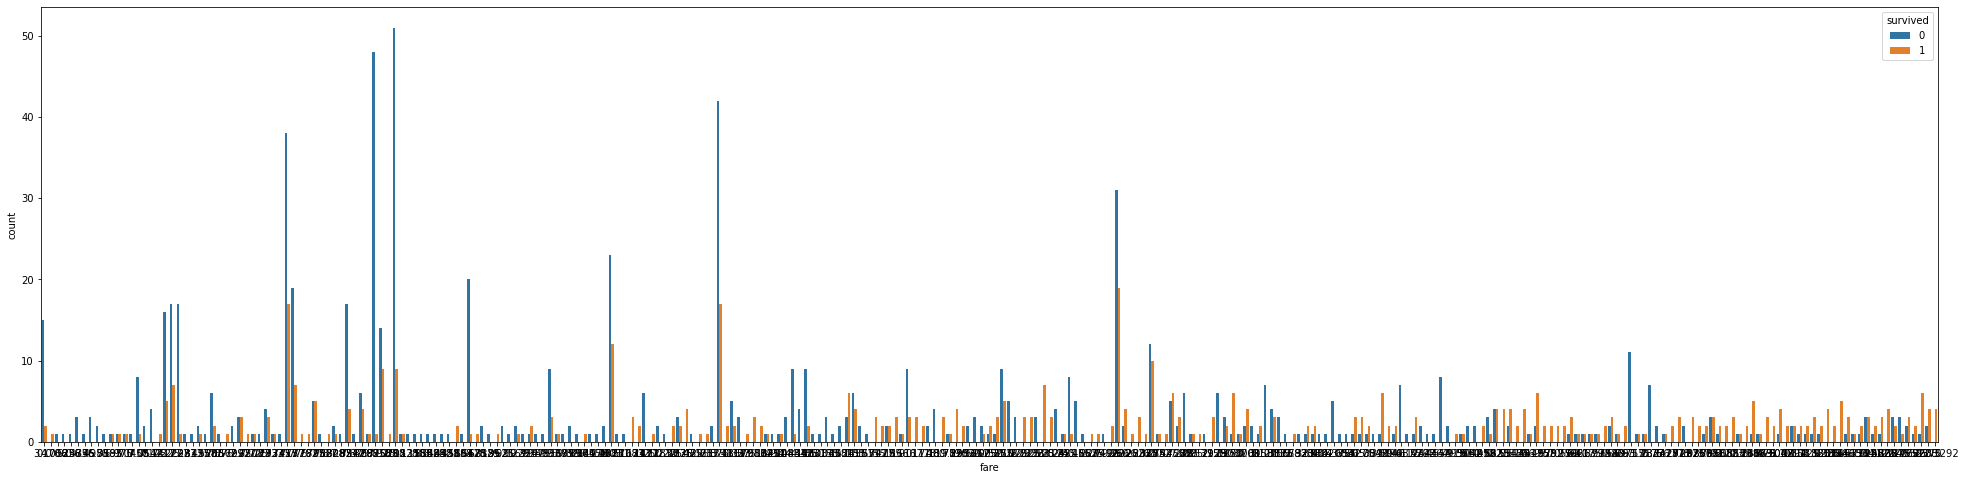

In [45]:
#금액이 높아짐에 따라 생존률이 증가하는 것으로 확인된다
plt.figure(figsize=(34,8))
sns.countplot(data=df, x='fare', hue='survived')
plt.show()

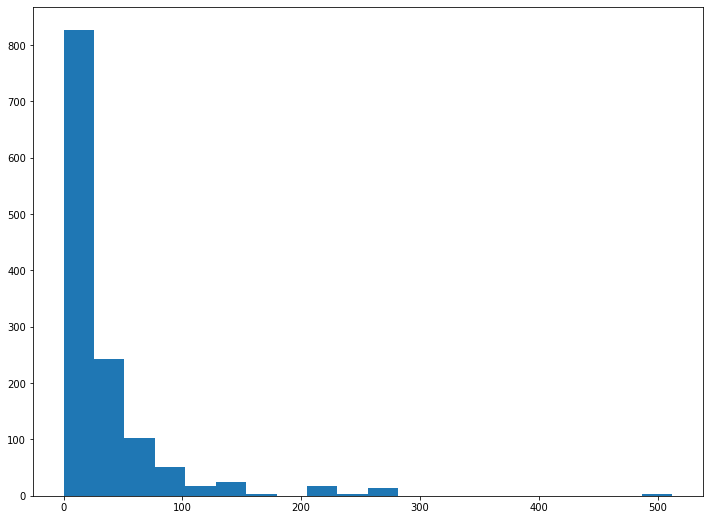

In [47]:
#하지만 낮은 금액대에 대부분의 데이터가 몰려있어서 상관관계를 파악하기 어렵다.
df3['fare'].hist(bins=20,figsize=(12,9),grid=False)

In [32]:
#'fare'지불한 운임에 따른 생존률
pd.pivot_table(data=df3, index=['fare'], values='survived', aggfunc=['sum','mean','count'])

###age컬럼
####추측 : 상대적으로 신체조건이 가장 뛰어난 20 30대의 연령이 생존률에 더 유리할 것이다. 

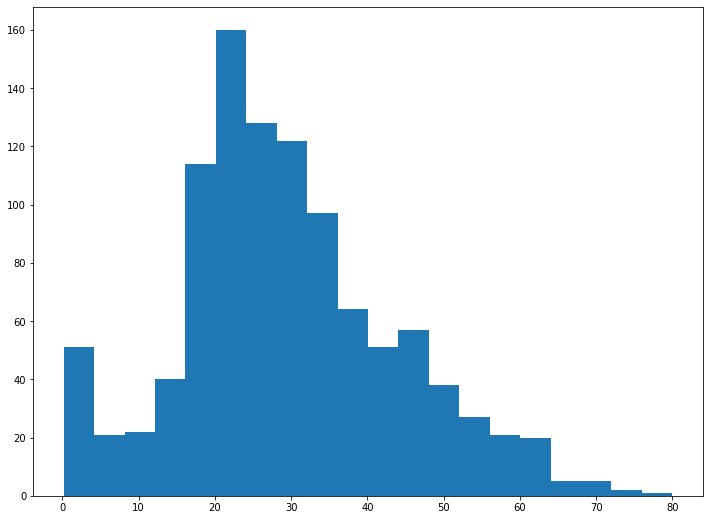

In [46]:
df['age'].hist(bins=20,figsize=(12,9),grid=False)

# 4.정리
##무엇이 생존에 영향을 미쳤을까?


###생존률과 유의미한 상관관계를 갖는 컬럼은 sex, pclass, embarked 세 가지로 구분된다. 
###자식이나, 가족 수에 따른 생존률 변화는 데이터가 충분하지 않아 검증하기 어려울 것으로 보인다.
<br><br>
###1.   sex컬럼 - 동일한 조건에서 남성에 비해 여성이 앞도적으로 높은 생존룰을 보여준다
<br>

###2.   pclass컬럼 - 객실등급이 높으면 생존률이 상대적으로 높은것을 확인할 수 있다. 다만 여성의 경우 객실등급이 1,2 일때 높은 생존률을 보여주지만, 남성의 경우 객실등급이 1등급인 경우를 제외하고 낮은 생존률을 보입니다.
<br>

###3.   emberked컬럼
####선착장 위치에 따라 생존률 변화가 관찰됩니다. C > Q > S 
####C선착장이 구명보트에 접근하기 쉬운 위치 or 탈출에 유리한 장소였을 것이라고 예상됩니다.

